In [1]:
csv_path = 'sqlResult_1558435.csv'

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [4]:
content = content.fillna('')
news_content = content['content'].tolist()

In [5]:
import jieba

In [6]:
def cut(string): return ' '.join(jieba.cut(string))

In [7]:
import re

In [8]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [9]:
news_content = [token(n) for n in news_content]

In [10]:
news_content = [' '.join(n) for n in news_content[:100]]

In [12]:
news_content = [cut(n) for n in news_content]

Building prefix dict from the default dictionary ...
Loading model from cache E:\Temp\jieba.cache
Loading model cost 2.435 seconds.
Prefix dict has been built succesfully.


In [16]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [17]:
def document_frequency(word): 
    return sum(1 for n in news_content if word in n)

In [18]:
document_frequency('的')

97

In [19]:
import math

In [20]:
def idf(word):
    """Gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [21]:
idf('的')

0.013228265733755101

In [22]:
idf('小米')

1.5228787452803376

In [23]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [27]:
tf('阴线', news_content[11])

2

In [28]:
def get_keywords_of_a_ducment(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [37]:
machine_new_keywords = get_keywords_of_a_ducment(news_content[11])

In [32]:
import wordcloud

In [65]:
wc = wordcloud.WordCloud('SourceHanSerifSC-Regular.otf')

In [66]:
import matplotlib.pyplot as plt

In [67]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

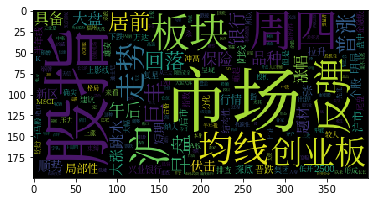

In [68]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [69]:
pip install pdfminder

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement pdfminder (from versions: none)
ERROR: No matching distribution found for pdfminder
